In [2]:
!pip install opendatasets -q

In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od

import time

In [69]:
download = od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [70]:
batch_size = 32
image_size = (128,128)

In [71]:
test_dataset = "/content/cats-and-dogs-for-classification/cats_dogs/test"
train_dataset = "/content/cats-and-dogs-for-classification/cats_dogs/train"

dividing train dataset for training and validation

validation size 10% of training

In [72]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dataset,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_dataset,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dataset,
    image_size=image_size,
    batch_size=batch_size
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [73]:
train_data.class_names

['cats', 'dogs']

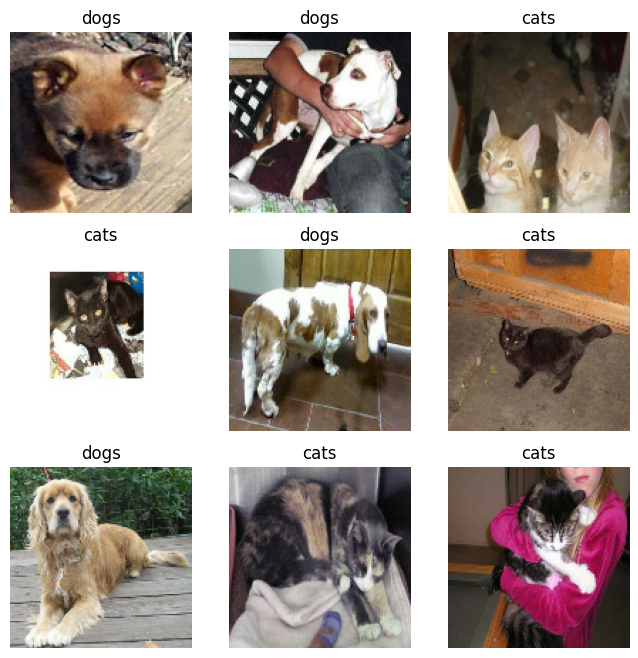

In [75]:
plt.figure(figsize=(8,8))
for images,labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_data.class_names[labels[i]])
    plt.axis('off')

In [16]:
for images,labels in train_data.take(1):
  for i in range(1):
    print(images)

tf.Tensor(
[[[[178.12457   190.02301   147.10306  ]
   [179.81735   197.53815   144.49518  ]
   [180.59491   199.06366   134.18625  ]
   ...
   [153.7839    170.85992   149.26227  ]
   [148.6991    170.15613   134.05066  ]
   [179.93253   197.2821    144.33282  ]]

  [[142.06769   155.22562   109.06769  ]
   [157.26572   177.26572   125.651886 ]
   [163.87808   182.5148    126.49136  ]
   ...
   [184.98666   185.51791   177.86948  ]
   [147.64072   152.04974   130.67865  ]
   [150.65292   160.00635   119.324615 ]]

  [[102.635315  116.07852    68.92438  ]
   [ 95.55441   114.16379    68.55441  ]
   [122.409485  136.86923    94.40405  ]
   ...
   [174.9324    163.34647   161.15115  ]
   [206.13199   195.67346   184.78433  ]
   [170.49738   172.61276   141.85886  ]]

  ...

  [[237.98196   218.98196   204.98196  ]
   [234.45163   215.45163   201.45163  ]
   [239.87772   220.87772   206.87772  ]
   ...
   [123.9465    111.9465    121.9465   ]
   [130.48196   118.481964  128.48196  ]
   [1

feature scalling - normalized using lamdba func

In [76]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [18]:
for images,labels in train_data.take(1):
  for i in range(1):
    print(images)

tf.Tensor(
[[[[7.37645090e-01 7.74302602e-01 8.47050726e-01]
   [7.21746504e-01 7.72726893e-01 8.37940276e-01]
   [9.48587418e-01 9.84941781e-01 1.00000000e+00]
   ...
   [1.36979163e-01 1.33057594e-01 1.56587005e-01]
   [1.47656247e-01 1.43734679e-01 1.67264089e-01]
   [1.52803302e-01 1.52803302e-01 1.56326592e-01]]

  [[5.07817924e-01 5.52531064e-01 6.37978375e-01]
   [5.99392176e-01 6.58608079e-01 7.29171574e-01]
   [8.45732570e-01 8.83983195e-01 9.19788241e-01]
   ...
   [1.67800248e-01 1.63878679e-01 1.83486521e-01]
   [1.56179324e-01 1.52257755e-01 1.71865612e-01]
   [1.49433210e-01 1.49433210e-01 1.52956501e-01]]

  [[4.94879156e-01 5.44841945e-01 6.41863525e-01]
   [5.78987300e-01 6.37810826e-01 7.26628184e-01]
   [7.97823608e-01 8.47656250e-01 8.95052075e-01]
   ...
   [1.72549024e-01 1.72549024e-01 1.80392161e-01]
   [1.71859682e-01 1.71859682e-01 1.79702818e-01]
   [1.74402580e-01 1.74402580e-01 1.74402580e-01]]

  ...

  [[5.00428915e-01 4.78278190e-01 5.83110154e-01]
   [4

creating data augmentation layer

In [77]:
data_augmenatation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model = tf.keras.models.Sequential()

model.add(data_augmenatation)

model.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [81]:
start = time.time()

history = model.fit(
    train_data,
    validation_data = validation_data,
    epochs = 20
)

end = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.5706 - loss: 0.6928 - val_accuracy: 0.5050 - val_loss: 0.6857
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6107 - loss: 0.6487 - val_accuracy: 0.5738 - val_loss: 0.6525
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6469 - loss: 0.6151 - val_accuracy: 0.6725 - val_loss: 0.6154
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.6808 - loss: 0.5915 - val_accuracy: 0.6700 - val_loss: 0.6317
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7004 - loss: 0.5751 - val_accuracy: 0.7063 - val_loss: 0.5676
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.7124 - loss: 0.5569 - val_accuracy: 0.7275 - val_loss: 0.5303
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7316 - loss: 0.5326 - val_accuracy: 0.6325 - val_loss: 0.6884
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7287 - loss: 0.5382 - va

In [82]:
end-start

196.2285933494568

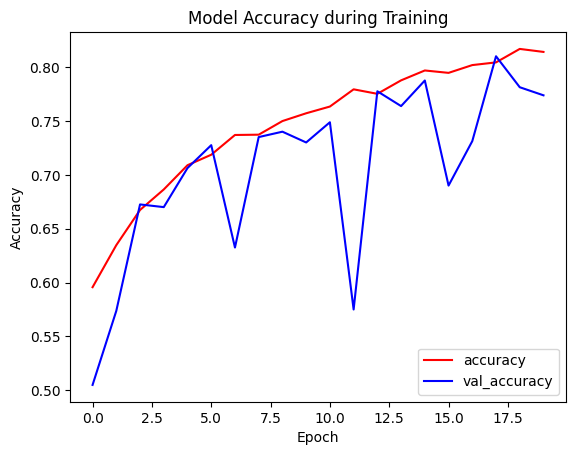

In [83]:
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
plt.title('Model Accuracy during Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [84]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [85]:
for batch in test_data.as_numpy_iterator():
  image,label = batch
  y_predict = model.predict(image)
  precision.update_state (label,y_predict)
  recall.update_state (label,y_predict)
  accuracy.update_state (label,y_predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [86]:
print('precision: ',precision.result().numpy())
print('recall: ',recall.result().numpy())
print('accuracy: ',accuracy.result().numpy())

precision:  0.733124
recall:  0.934
accuracy:  0.797


In [101]:
#image_path = "/content/dog.jpg"
#image_path = "/content/kitty-cat-kitten-pet-45201.jpeg"

image_path = "/content/230412095218-02-shortest-dog.jpg"
image_path = tf.keras.utils.load_img(image_path)

In [102]:
resized_image = tf.image.resize(image_path,(128,128))
scaled_image  = resized_image/255

In [103]:
prediction = model.predict(np.expand_dims(scaled_image,0))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.9912685]], dtype=float32)

In [104]:
if prediction > 0.5:
  print('dog')
else:
  print('cat')

dog
